In [1]:
import numpy as np
import utils
import qiskit
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def distribution_pseudo_pvalue(probabilities, interactions, magnetic_fields=None, beta=1):
	measurements = probabilities.keys()
	real_energies = dict()
	for mes in measurements:
		real_energies[mes] = spins_energy(spins_from_string01(mes), interactions, magnetic_fields, beta)
	ratio_sum = 0
	combs = 0
	for (mes1, mes2) in combinations(measurements, r=2):
		combs += 1
		obtained_probs_ratio = probabilities[mes1] / probabilities[mes2]
		real_probs_ratio = real_energies[mes1] / real_energies[mes2]
		ratio_sum += max(obtained_probs_ratio, real_probs_ratio) / min(obtained_probs_ratio, real_probs_ratio)

	return 1 / (ratio_sum / combs)

In [8]:
provider = qiskit.IBMQ.load_account()

/home/user/.local/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


## 5 qubits linear

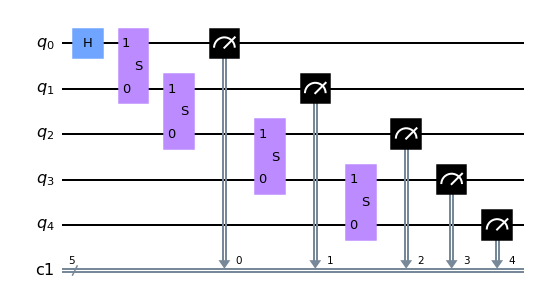

In [5]:
linear_interactions = {(i, i + 1): 1 for i in range(4)}
linear_circ = utils.linear_circuit(5, linear_interactions)
linear_circ.add_register(qiskit.ClassicalRegister(5))
linear_circ.measure(range(5), range(5))
linear_circ.draw('mpl')

### 8192 shots on lima and santiago qibm with 5 qubits

In [6]:
lima_df = pd.read_csv('measured_data/linear5_lima.csv', dtype={'Computational basis states': str})
santiago_df = pd.read_csv('measured_data/linear5_santiago.csv', dtype={'Computational basis states': str})

lima_result = {row['Computational basis states']: row['Probabilities'] for (ind, row) in lima_df.iterrows()}
santiago_result = {row['Computational basis states']: row['Probabilities'] for (ind, row) in santiago_df.iterrows()}

In [9]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')
job_sim = qiskit.execute(linear_circ, backend_sim, shots=8192)
sim_result = job_sim.result().get_counts()

In [11]:
true_pd = utils.get_probs_distribution(5, linear_interactions)
true_result = {row['s']: row['Pr[s]'] for (ind, row) in true_pd.iterrows()}

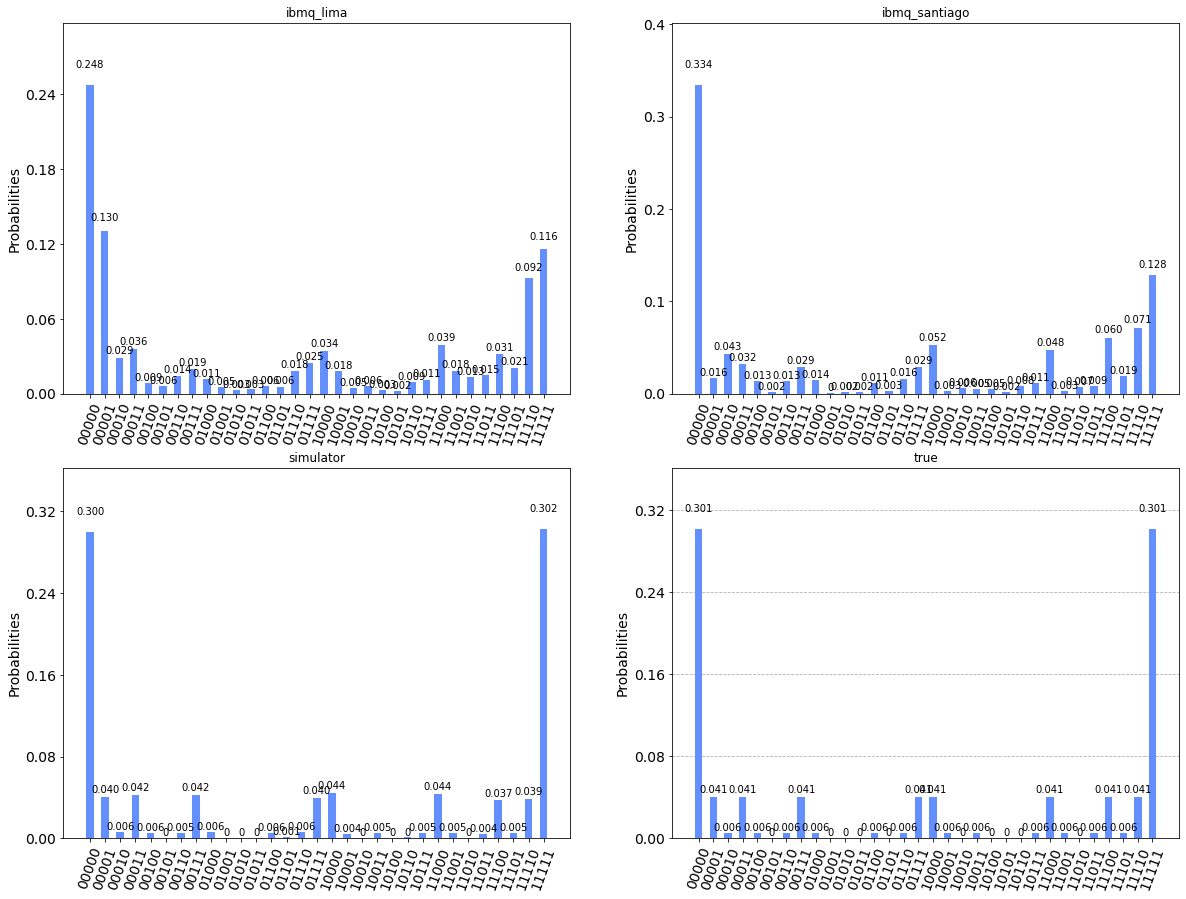

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_title('ibmq_lima')
ax2.set_title('ibmq_santiago')
ax3.set_title('simulator')
ax4.set_title('true')
fig.set_size_inches(20, 15)

qiskit.visualization.plot_histogram(lima_result, ax=ax1)
qiskit.visualization.plot_histogram(santiago_result, ax=ax2)
qiskit.visualization.plot_histogram(sim_result, ax=ax3)
qiskit.visualization.plot_histogram(true_result, ax=ax4)

In [10]:
utils.distribution_pseudo_pvalue(sim_result, linear_interactions)

0.5089042867449493

## 15 qubits linear

In [2]:
linear_interactions15 = {(i, i + 1): 1 for i in range(14)}
linear_circ15 = utils.linear_circuit(15, linear_interactions15)
linear_circ15.add_register(qiskit.ClassicalRegister(15))
linear_circ15.measure(range(15), range(15))

In [3]:
melbourne_df = pd.read_csv('measured_data/linear15_melbourne.csv', dtype={'Computational basis states': str})
melbourne_result = {row['Computational basis states']: row['Probabilities'] for (ind, row) in melbourne_df.iterrows()}

In [4]:
utils.distribution_pseudo_pvalue(melbourne_result, linear_interactions15)

2.1563956773784485e-06